# Assessing Galactic RM 

## v1 - Oppermann+14 map

## v2 - Hutschenreuter 2020 map

In [2]:
%matplotlib inline

In [25]:
# imports
import importlib_resources
from importlib import reload
import numpy as np

from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.table import Table

import healpy as hp
import h5py

from frb import rm

# Opperman 2014

## Load map

In [4]:
fg_file = str(importlib_resources.files('frb.data.RM')/'opp14_foreground.fits')

In [5]:
hdu = fits.open(fg_file)
hdu.info()

Filename: /home/xavier/Projects/FRB_Stuff/FRB/frb/data/RM/opp14_foreground.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  angspec       1 BinTableHDU     12   384R x 1C   [D]   
  2  profile       1 BinTableHDU     17   196608R x 1C   [E]   
  3  maps/s        1 BinTableHDU     17   196608R x 1C   [E]   
  4  maps/phi      1 BinTableHDU     17   196608R x 1C   [E]   
  5  uncertainty/s    1 BinTableHDU     17   196608R x 1C   [E]   
  6  uncertainty/phi    1 BinTableHDU     17   196608R x 1C   [E]   


In [6]:
rm_sky = hp.read_map(fg_file, hdu=4)

In [7]:
sig_sky = hp.read_map(fg_file, hdu=6)

## HealPix time

### View

0.0 180.0 -180.0 180.0


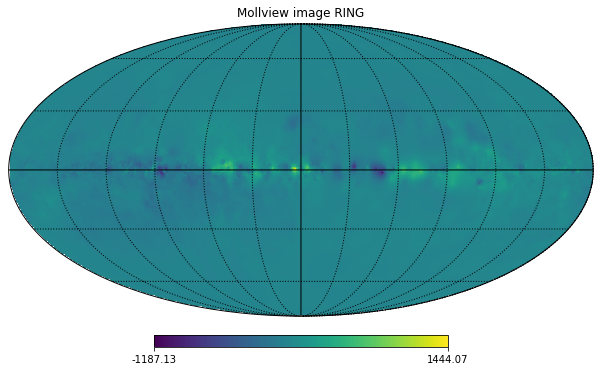

In [8]:
hp.mollview(rm_sky, title="Mollview image RING")
hp.graticule()

## Galactic RM

### Query a Coordinate

In [9]:
repeater_coord = SkyCoord('05h31m58.698s +33d8m52.59s', frame='icrs')

In [27]:
reload(rm)
RM, RM_err = rm.galactic_rm(repeater_coord, use_map=2014)
RM, RM_err

Loading RM information map from Oppermann et al. 2014


(<Quantity -17.727995 rad / m2>, <Quantity 76.4304 rad / m2>)

----

# 2020 Map

## Downloaded hd5 file from https://wwwmpa.mpa-garching.mpg.de/~ensslin/research/data/faraday2020.html

## Load

In [13]:
new_file = str(importlib_resources('frb.data.RM')/'faraday2020v2.fits')

In [14]:
hdu_2020 = fits.open(new_file)
hdu_2020.info()

Filename: /home/xavier/Projects/FRB_Stuff/FRB/frb/data/RM/faraday2020v2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     12   3145728R x 2C   [E, E]   


### Header

In [18]:
hdu_2020[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NSIDE   =                  512                                                  
UNIT    = 'rad/m^2 '                                                            

In [16]:
tbl_2020 = Table.read(new_file)

In [19]:
tbl_2020[0:5]

faraday_sky_mean,faraday_sky_std
float32,float32
2.0694778,1.2080269
2.229739,1.4129831
2.323173,1.6926917
2.1395113,1.3902909
1.9596202,1.413528


## Plot

In [20]:
rm_sky_2020 = hp.read_map(new_file)#, hdu=4)

In [21]:
rm_sky_2020

array([2.0694778, 2.229739 , 2.323173 , ..., 5.996136 , 5.944151 ,
       5.909238 ], dtype=float32)

0.0 180.0 -180.0 180.0


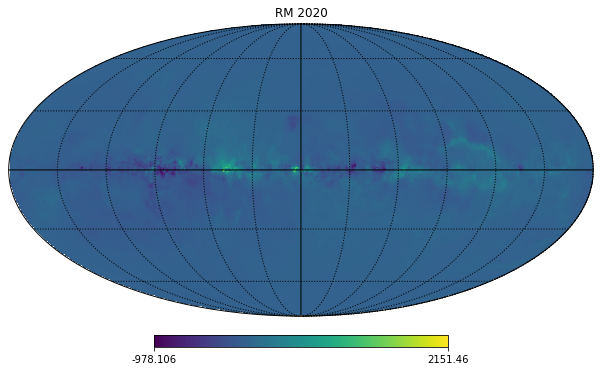

In [22]:
hp.mollview(rm_sky_2020, title="RM 2020")
hp.graticule()

## $\sigma({\rm RM})$

In [23]:
rm_sig_sky_2020 = hp.read_map(new_file, field=1)#, hdu=4)

0.0 180.0 -180.0 180.0


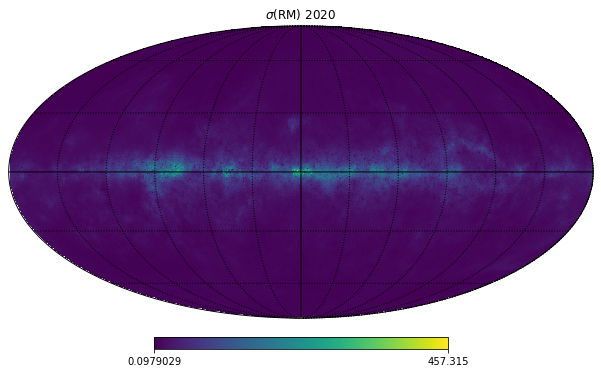

In [24]:
hp.mollview(rm_sig_sky_2020, title=r"$\sigma({\rm RM})$ 2020")
hp.graticule()

### RM in a given location

In [28]:
reload(rm)
RM_2020, RM_err_2020 = rm.galactic_rm(repeater_coord, use_map=2020)
RM_2020, RM_err_2020

Loading RM information map from Hutschenreuter et al. 2022


(<Quantity -17.589554 rad / m2>, <Quantity 37.336845 rad / m2>)

In [29]:
RM, RM_err

(<Quantity -17.727995 rad / m2>, <Quantity 76.4304 rad / m2>)